In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Markdown, display

dataX = np.loadtxt("preprocessed_data_2/dataX.csv", delimiter=",")
dataY = np.loadtxt("preprocessed_data_2/dataY.csv", delimiter=",")

channels = ["560nm","585nm","610nm","645nm","680nm","705nm","730nm","760nm","810nm","860nm","900nm","940nm", "Temperature"]

def printHeadline(str):
    display(Markdown(f"### {str}"))

In [2]:
dataX.shape, dataY.shape

((14, 13), (14,))

### The data were gathered this way:

- measurement of glucose concentration with glucometer
- gathering data for 10 minutes
- another measurement of glucose concentration with glucometer

The sensor had both VIS and IR LEDs on simultaneously during the measurement.

For these graphs I used an average of first 3 entries and glucose concentration measured.

I didn't use the last entries, because after 10 minutes of the LEDs being on, the temperature of the sensor raised and that affects the data.

The temperature at the beginning is always around the same value +- 1 degree

### Intensity/Temperature(last) vs. Concentration. Separated by channel.

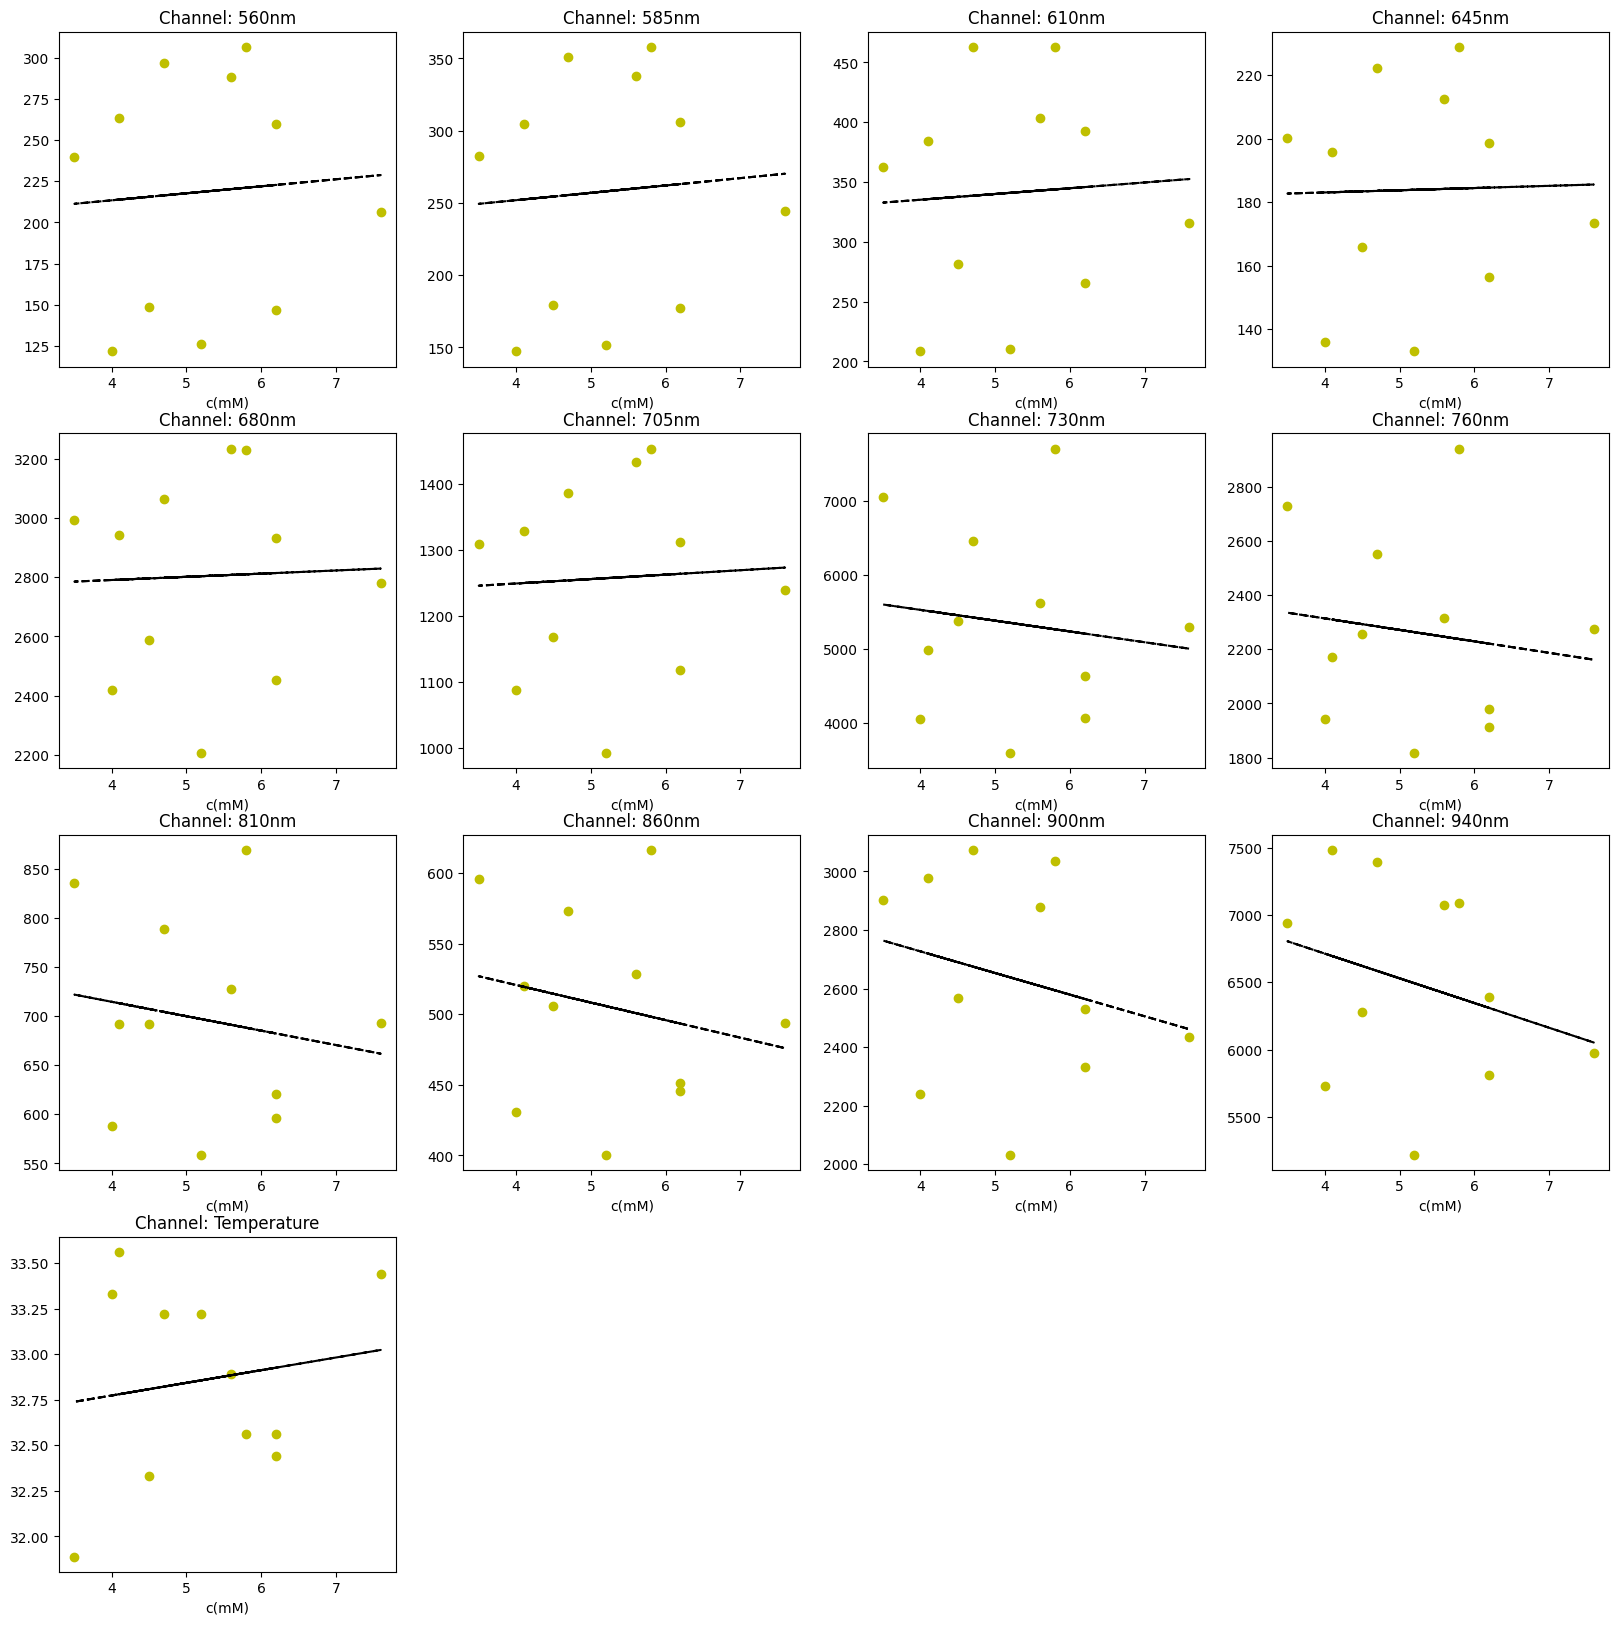

In [7]:
printHeadline("Intensity/Temperature(last) vs. Concentration. Separated by channel.")

plt.figure(figsize=(20, 20))
for ix, channel in enumerate(channels):
    
    x = dataY
    y = dataX[:, ix]
    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef) 
    
    plt.subplot(4, 4, ix + 1)
    plt.title(f"Channel: {channels[ix]}")
    plt.xlabel("c(mM)")
    plt.plot(x, y, 'yo', x, poly1d_fn(x), '--k')
        
plt.show()
    

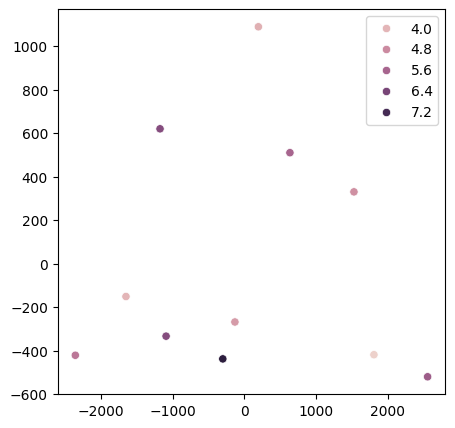

In [8]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
transformed = pca.fit_transform(dataX)

plt.figure(figsize=(5, 5))

sns.scatterplot(x = transformed[:, 0], y = transformed[:, 1],
                hue=dataY)
    
plt.show()